# Cross-Country Comparison
Objective: Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

In [21]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import os
import sys

# loading modules 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

from data_loader import get_file_path, get_cleaned_data, CSVData

In [7]:
# Load each country’s cleaned CSV 
# Load Benin data
benin = get_cleaned_data("benin_cleaned")
benin_cleaned = CSVData(benin).load_data()

# Load sierraleone data
sierraleone_path = get_cleaned_data("sierraleone_cleaned")
sierraleone_data = CSVData(sierraleone_path).load_data()

# Load Benin data
togo_path = get_cleaned_data("togo_cleaned")
benin_data = CSVData(togo_path).load_data()

In [8]:
# Add country column for distinction
benin_cleaned['Country'] = 'Benin'
sierraleone_data['Country'] = 'SierraLeone'
benin_data['Country'] = 'Togo'

In [9]:
# Concatenate datasets
df_all = pd.concat([benin_cleaned, sierraleone_data, benin_data], ignore_index=True)

In [11]:
df_all= df_all.drop(columns=['has_outlier'])

In [12]:
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


## Country Comparizen using Different Metrics
#### Boxplots for GHI, DNI, DHI

In [16]:
def plot_boxplots(df, metrics=['GHI', 'DNI', 'DHI']):
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), sharey=False)

    for i, metric in enumerate(metrics):
        sns.boxplot(
            data=df,
            x='Country',
            y=metric,
            hue='Country',
            palette='Set2',
            legend=False,
            ax=axes[i]
        )
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_ylabel(f'{metric} (W/m²)')
        axes[i].set_xlabel('Country')

    plt.tight_layout()
    plt.show()


Generating boxplots for GHI, DNI, and DHI...


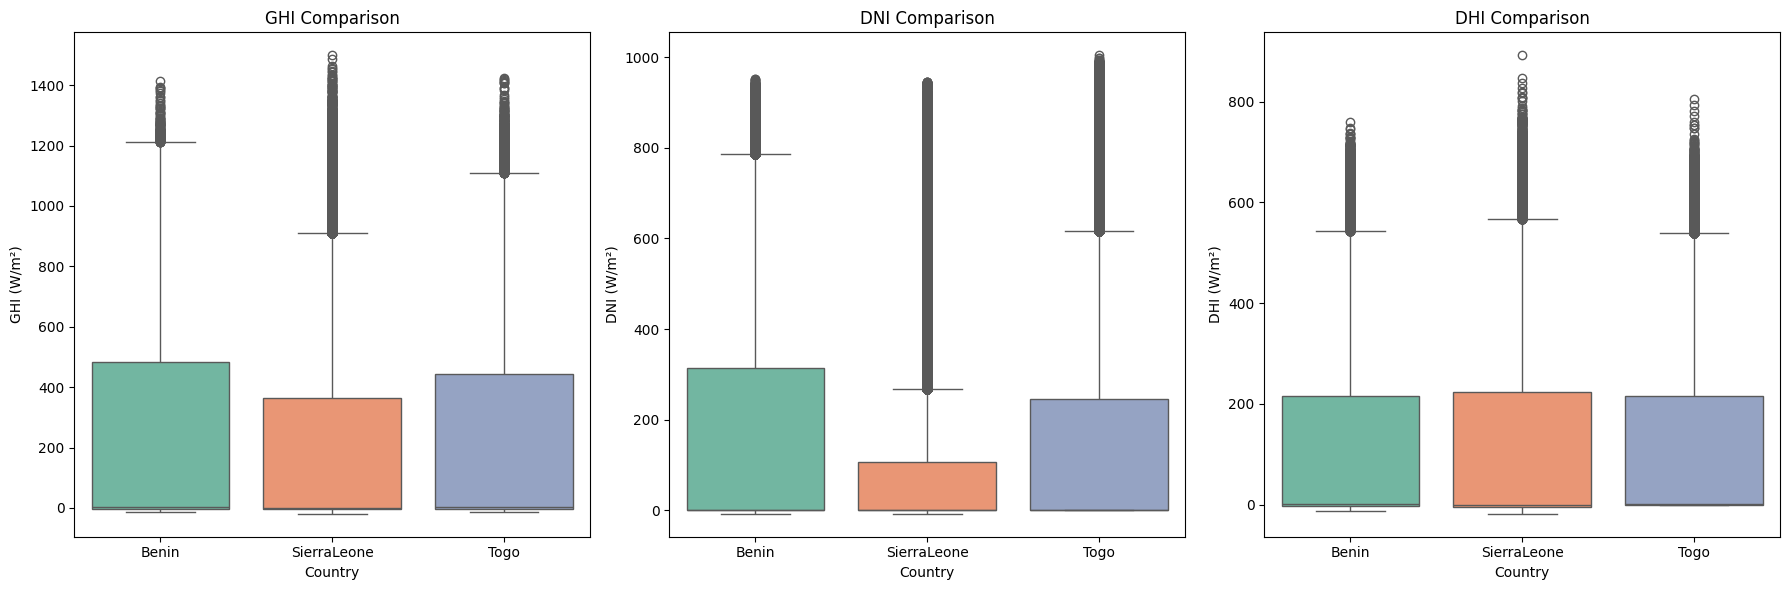

In [17]:
print("Generating boxplots for GHI, DNI, and DHI...")
plot_boxplots(df_all)

### Summary Table

In [18]:
def generate_summary_table(df):
    summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]  # Flatten multi-index
    summary.reset_index(inplace=True)
    return summary

In [20]:
print("Generating summary statistics table...")
summary_table = generate_summary_table(df_all)
summary_table

Generating summary statistics table...


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
1,SierraLeone,201.957515,0.3,298.495150,116.376337,-0.1,218.652659,113.720571,-0.1,158.946032
2,Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


##  Statistical Testing

In [24]:
def run_statistical_tests(df):
    # Separate GHI by country
    ghi_benin = df[df['Country'] == 'Benin']['GHI']
    ghi_sierra_leone = df[df['Country'] == 'SierraLeone']['GHI']
    ghi_togo = df[df['Country'] == 'Togo']['GHI']

    # One-Way ANOVA
    anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

    # Kruskal-Wallis Test
    kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)

    print("=== Statistical Test Results on GHI ===")
    print(f"One-Way ANOVA: F = {anova_stat:.3f}, p = {anova_p:.5f}")
    print(f"Kruskal–Wallis: H = {kruskal_stat:.3f}, p = {kruskal_p:.5f}")

    if anova_p < 0.05:
        print("→ Significant difference detected by ANOVA (p < 0.05)")
    else:
        print("→ No significant difference detected by ANOVA (p ≥ 0.05)")

    if kruskal_p < 0.05:
        print("→ Significant difference detected by Kruskal–Wallis (p < 0.05)")
    else:
        print("→ No significant difference detected by Kruskal–Wallis (p ≥ 0.05)")


In [25]:
print("\nRunning statistical tests on GHI...")
run_statistical_tests(df_all)


Running statistical tests on GHI...
=== Statistical Test Results on GHI ===
One-Way ANOVA: F = 2090.093, p = 0.00000
Kruskal–Wallis: H = 4524.883, p = 0.00000
→ Significant difference detected by ANOVA (p < 0.05)
→ Significant difference detected by Kruskal–Wallis (p < 0.05)


## The Key Observations

✅Benin exhibits the highest median and mean GHI among the three countries, indicating strong solar potential. However, its variability is also relatively high, suggesting greater fluctuation in solar irradiance.

✅Sierra Leone consistently shows the lowest GHI, DNI, and DHI values, making it the least favorable for solar energy generation among the countries compared.

✅Statistical tests (ANOVA and Kruskal–Wallis) confirm that differences in GHI across the three countries are highly significant (p < 0.001),   reinforcing the value of tailoring solar strategies by country.

### Visual Summary using Bar Chart

In [28]:
def plot_average_ghi_bar(df):
    avg_ghi_df = df.groupby('Country', as_index=False)['GHI'].mean().sort_values(by='GHI', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=avg_ghi_df,
        x='GHI',
        y='Country',
        hue='Country',
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title('Average GHI by Country')
    plt.xlabel('Average GHI (W/m²)')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()




Plotting average GHI by country...


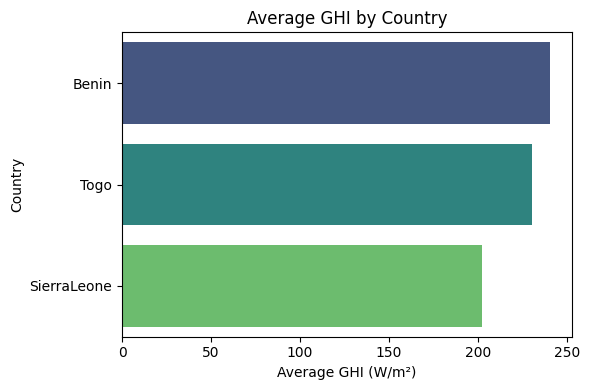

In [ ]:
print("\nPlotting average GHI by country...")
plot_average_ghi_bar(df_all)